# 载入数据

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] =False
%matplotlib inline 

In [2]:
import os

PATH="../../input"
print(os.listdir(PATH))

['application_test.csv', 'POS_CASH_balance.csv', '.gitkeep', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [3]:
application_train = pd.read_csv(PATH+"/application_train.csv")

In [ ]:

application_test = pd.read_csv(PATH+"/application_test.csv")
bureau = pd.read_csv(PATH+"/bureau.csv")
bureau_balance = pd.read_csv(PATH+"/bureau_balance.csv")
credit_card_balance = pd.read_csv(PATH+"/credit_card_balance.csv")
installments_payments = pd.read_csv(PATH+"/installments_payments.csv")
previous_application = pd.read_csv(PATH+"/previous_application.csv")
POS_CASH_balance = pd.read_csv(PATH+"/POS_CASH_balance.csv")

# 数据概况
行列数，预览前五行，列名

In [ ]:
print("application_train -  rows:",application_train.shape[0]," columns:", application_train.shape[1])
print("application_test -  rows:",application_test.shape[0]," columns:", application_test.shape[1])
print("bureau -  rows:",bureau.shape[0]," columns:", bureau.shape[1])
print("bureau_balance -  rows:",bureau_balance.shape[0]," columns:", bureau_balance.shape[1])
print("credit_card_balance -  rows:",credit_card_balance.shape[0]," columns:", credit_card_balance.shape[1])
print("installments_payments -  rows:",installments_payments.shape[0]," columns:", installments_payments.shape[1])
print("previous_application -  rows:",previous_application.shape[0]," columns:", previous_application.shape[1])
print("POS_CASH_balance -  rows:",POS_CASH_balance.shape[0]," columns:", POS_CASH_balance.shape[1])

### application_train

In [4]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

## 查看缺失值情况

In [6]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)#统计每个字段缺失的个数并按降序排列
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)#缺失比例：每个字段缺失个数除以总长度
    mis_val_table = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])#横向拼接
    # Print some summary information
    print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
        "There are " + str(len(mis_val_table.loc[mis_val_table['Total']!=0])) +
          " columns that have missing values.")
    return mis_val_table

### application_train

In [7]:
missing_data(application_train).head(10)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


## 查看样本不平衡情况

**TARGET** value 0 means loan is repayed, value 1 means loan is not repayed.

In [ ]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


# 3.探索性分析EDA  初步了解数据
看每个变量的分布及其与坏账率的关系

1.分类型变量分布图与坏账率

In [106]:
def plot_stats(feature,dataset,label_rotation=False,horizontal_layout=True):
    #计算每个类别的数量
    temp = dataset[feature].value_counts(sort=False)
    temp.sort_index(inplace=True)
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})
    # 计算每个类别中标签=1数量比例
    cat_perc = dataset[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
#     cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(18,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):#用来空值X轴标签值旋转
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.pointplot(ax=ax2, x = feature, y='TARGET', data=cat_perc)#各类别坏账率折线图
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        
        
    #添加数值标签
    x=list(range(len(cat_perc[feature])))
    p=cat_perc['TARGET']
    for a,b in zip(x,p):
        ax2.text(a, b, '%.3f' % b,ha='center', va= 'bottom',fontsize=10)
    for a,b in zip(x,temp):
        ax1.text(a, b+0.003,'%d' % b, ha='center', va= 'bottom',fontsize=10)
        
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

#     plt.show();
    plot.save('../../')

### 2.连续型变量分布图

In [75]:
# Plot distribution of one feature
def plot_distribution(feature,dataset,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    s= sns.distplot(dataset[feature].dropna(),color=color, kde=True,bins=100)
#     s= sns.boxplot(dataset[feature])
    plt.show()   

### 3.在target=1/0时，连续型变量的分布

In [10]:
# 在target=1/0时，变量的分布
def plot_distribution_comp(var,dataset,nrow=2):
    
    i = 0
    t1 = dataset.loc[dataset['TARGET'] != 0]
    t0 = dataset.loc[dataset['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

### 3.去除异常值之后连续型变量的概率分布图

In [11]:
# Source: https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting (see references)

def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def plot_o_distribution(feature,dataset,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    x = dataset[feature].dropna()
    filtered = x[~is_outlier(x)]
    sns.distplot(filtered,color=color, kde=True,bins=100)
    plt.show() 



## application 

1.申请表的ID从100001——456255 共356255条申请记录

## application_train

In [12]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [14]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [15]:
len(application_train['SK_ID_CURR'].unique())

307511

In [141]:
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats
def _get_int_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'int64']
    return feats

In [140]:
_get_categorical_features(application_train)

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [142]:
_get_int_features(application_train)

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

## 贷款人基本信息 

CNT_FAM_MEMBERS 家庭成员数量

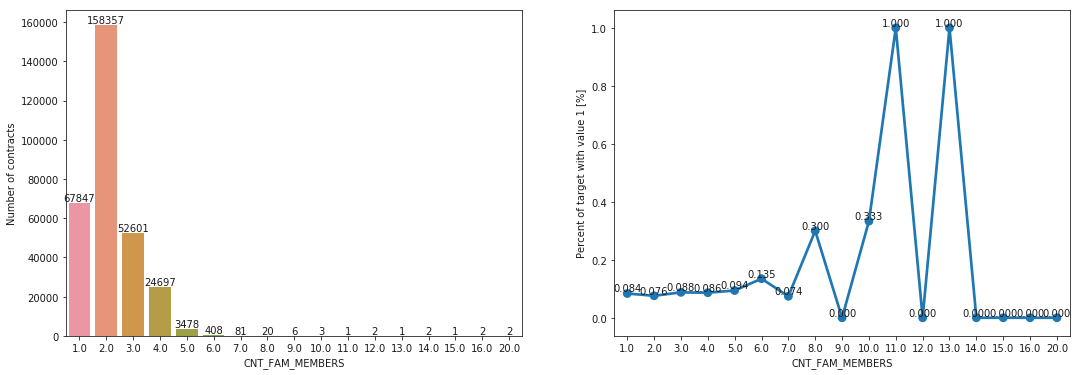

In [107]:
plot_stats('CNT_FAM_MEMBERS',application_train)

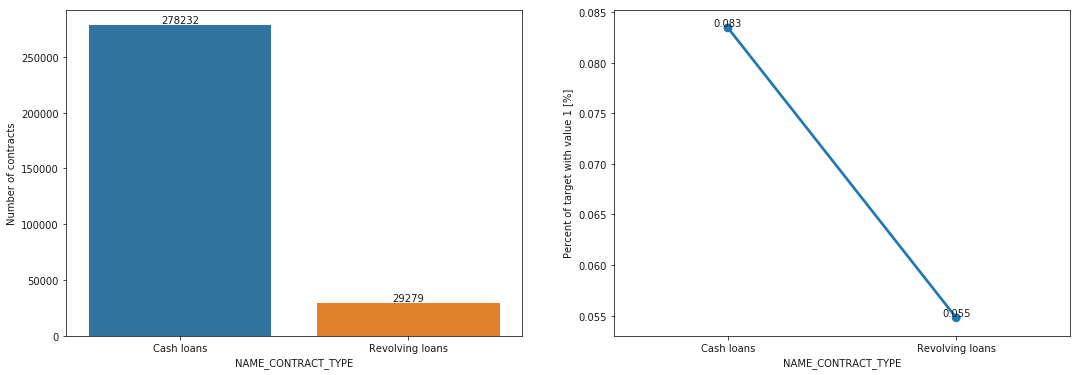

In [108]:
plot_stats('NAME_CONTRACT_TYPE',application_train)

## 车房信息 

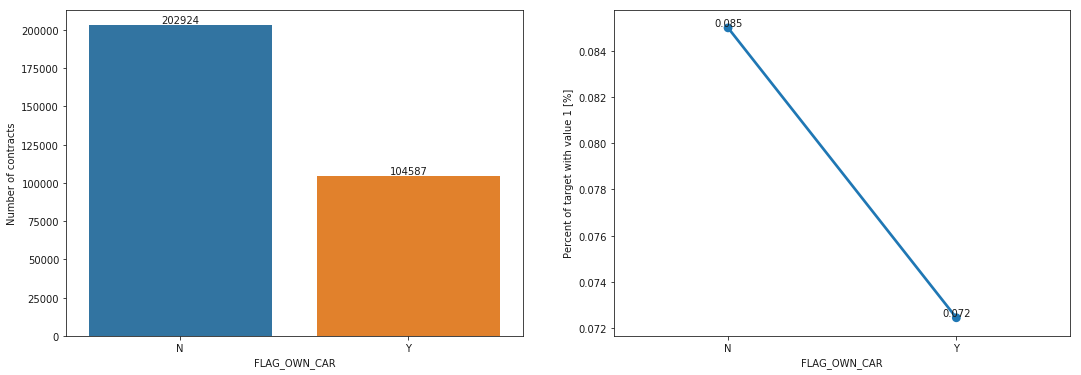

In [109]:
plot_stats('FLAG_OWN_CAR',application_train)

大多数贷款申请时贷款人没有车，并且无车的贷款人违约率要高于有车一族

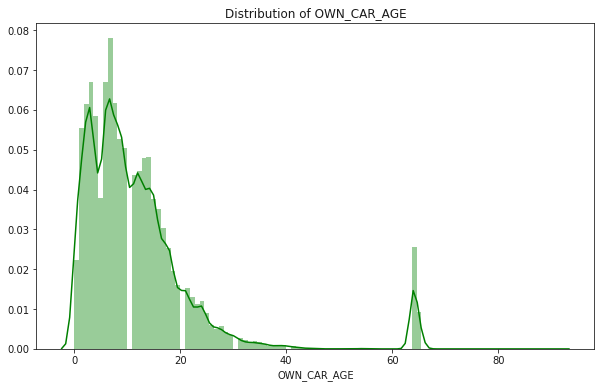

In [76]:
plot_distribution('OWN_CAR_AGE',application_train,'green')

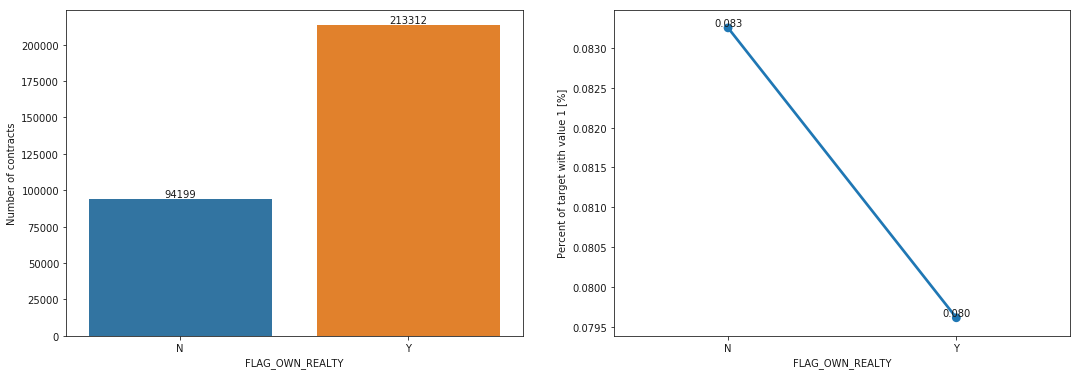

In [110]:
plot_stats('FLAG_OWN_REALTY',application_train)

大多数贷款申请时贷款人都有房产，无房产的贷款人违约率要高于有房产的

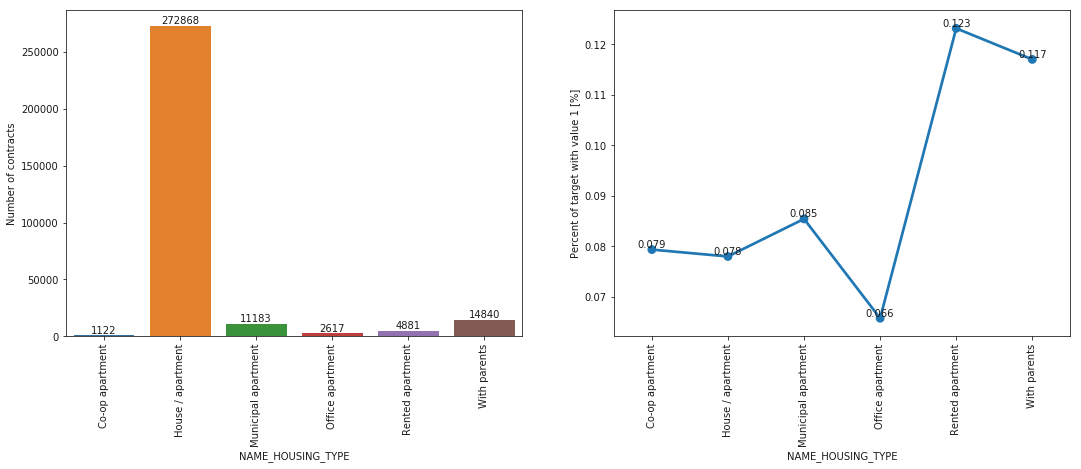

In [111]:
plot_stats('NAME_HOUSING_TYPE',application_train,True,True)

房产类型有合作公寓/公寓式/市政公寓/办公式公寓/出租式公寓/和父母一起住。这其中，住在出租屋的人以及和父母一起住的申请人违约率较高

## 贷款人信息完整程度 

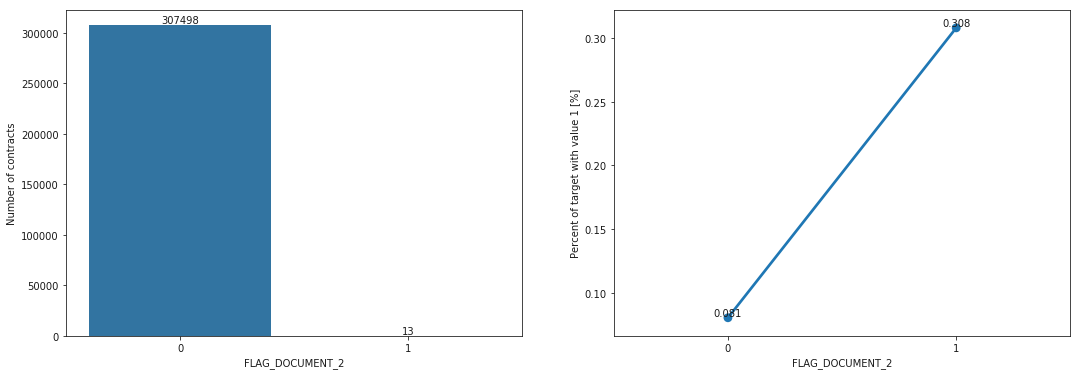

In [112]:
plot_stats('FLAG_DOCUMENT_2',application_train)

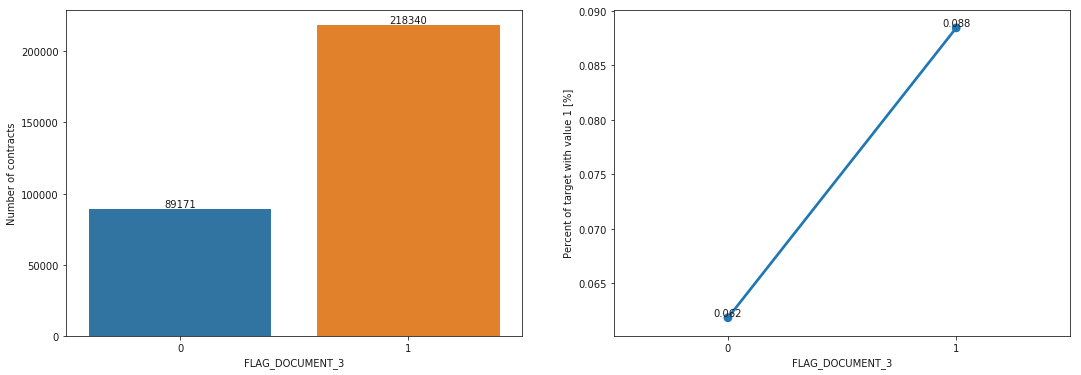

In [113]:
plot_stats('FLAG_DOCUMENT_3',application_train)

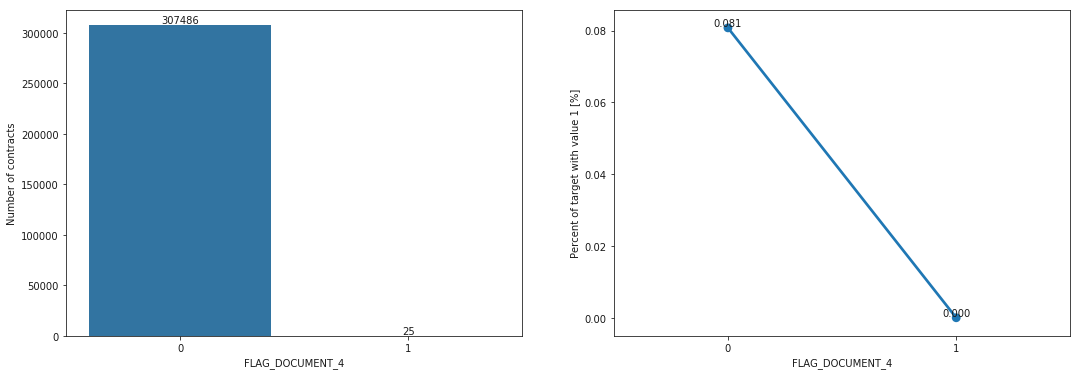

In [114]:
plot_stats('FLAG_DOCUMENT_4',application_train)

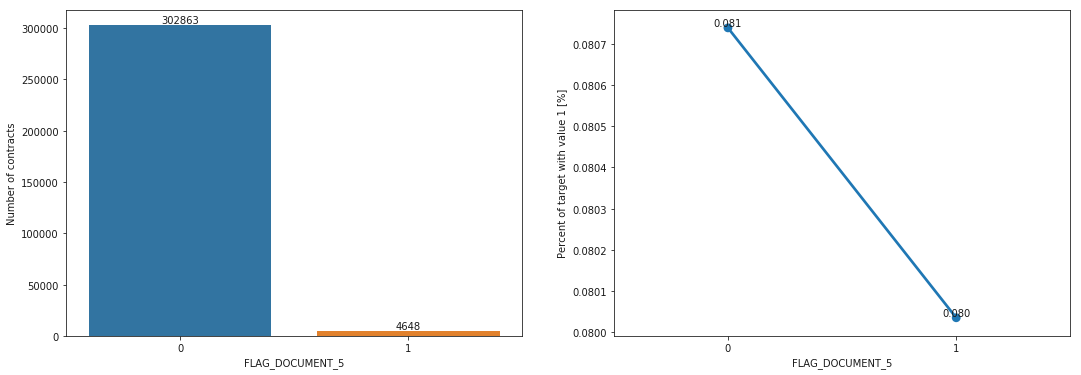

In [115]:
plot_stats('FLAG_DOCUMENT_5',application_train)

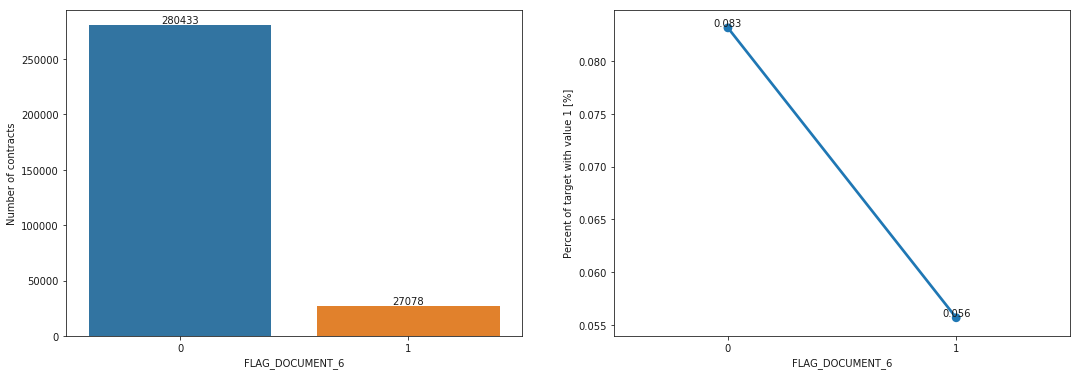

In [116]:
plot_stats('FLAG_DOCUMENT_6',application_train)

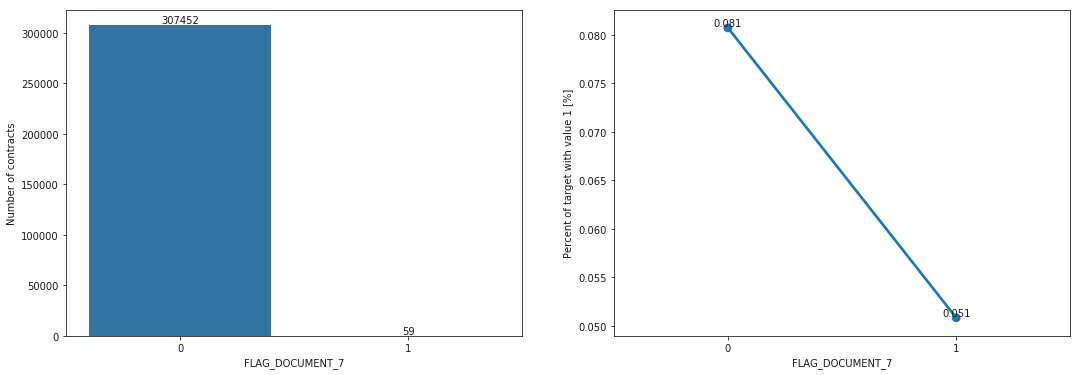

In [117]:
plot_stats('FLAG_DOCUMENT_7',application_train)

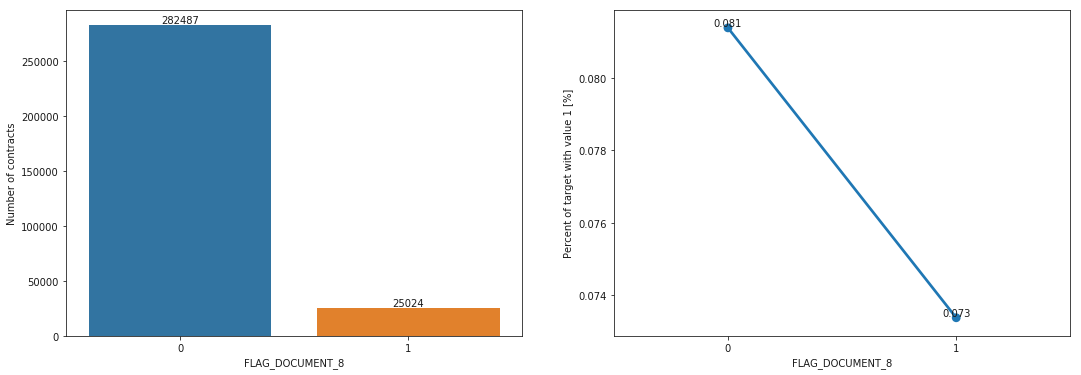

In [118]:
plot_stats('FLAG_DOCUMENT_8',application_train)

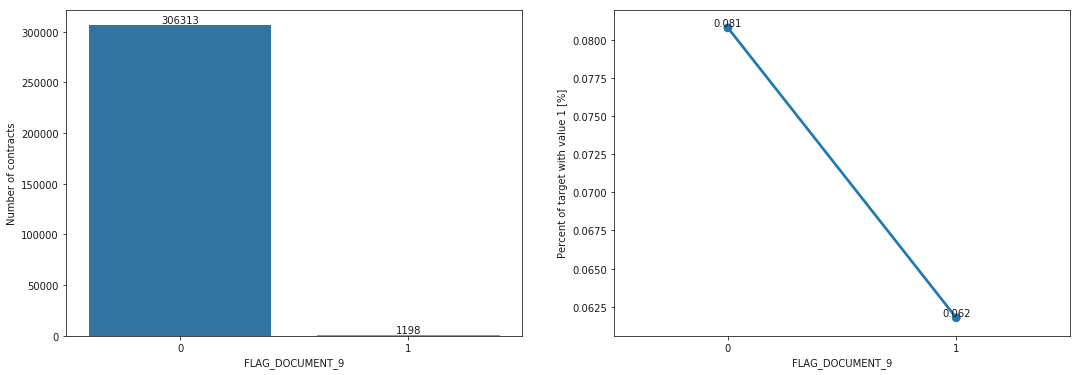

In [119]:
plot_stats('FLAG_DOCUMENT_9',application_train)

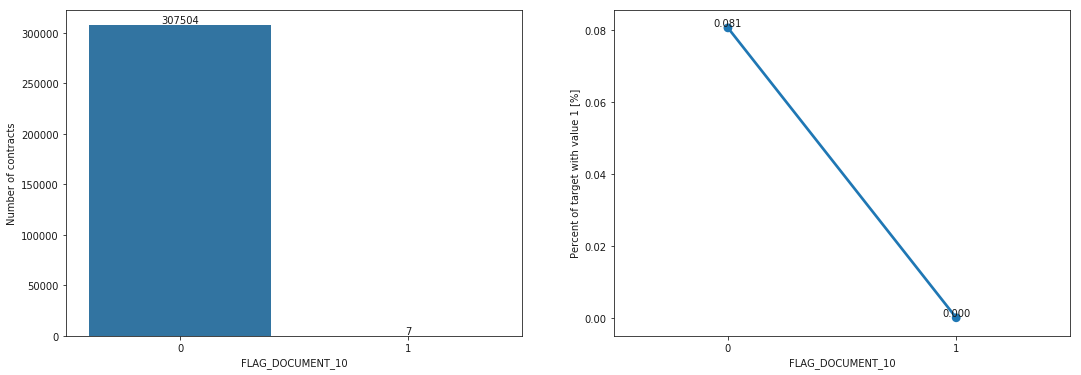

In [120]:
plot_stats('FLAG_DOCUMENT_10',application_train)

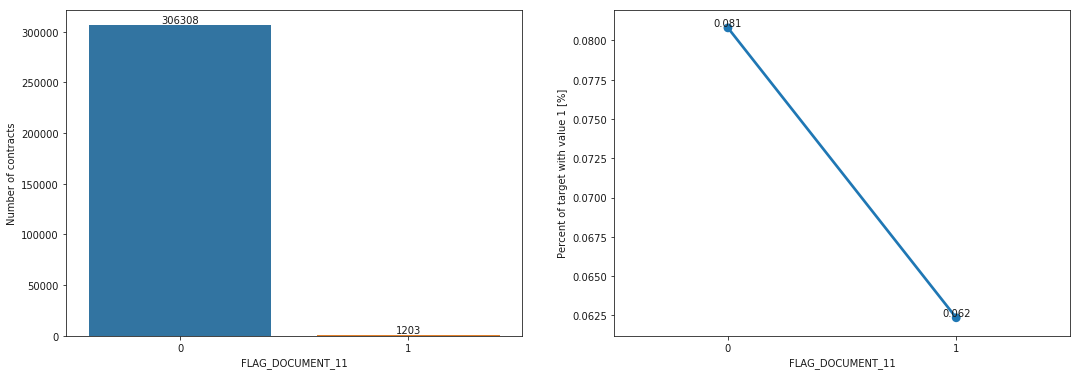

In [121]:
plot_stats('FLAG_DOCUMENT_11',application_train)

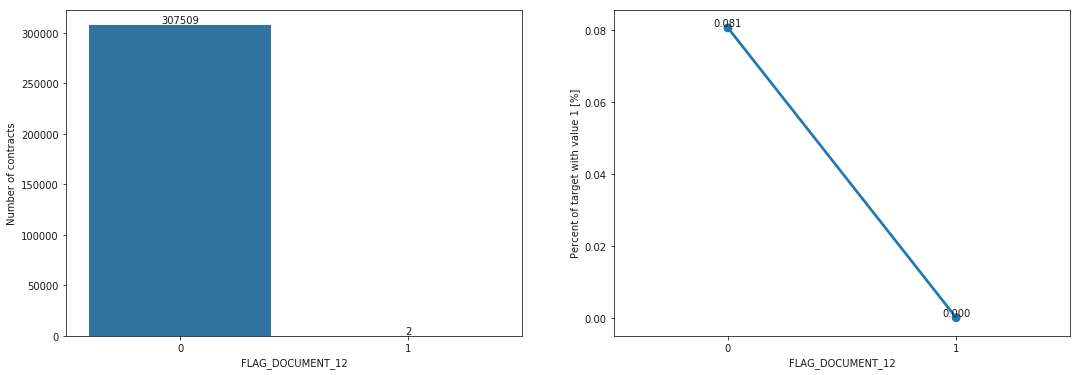

In [122]:
plot_stats('FLAG_DOCUMENT_12',application_train)

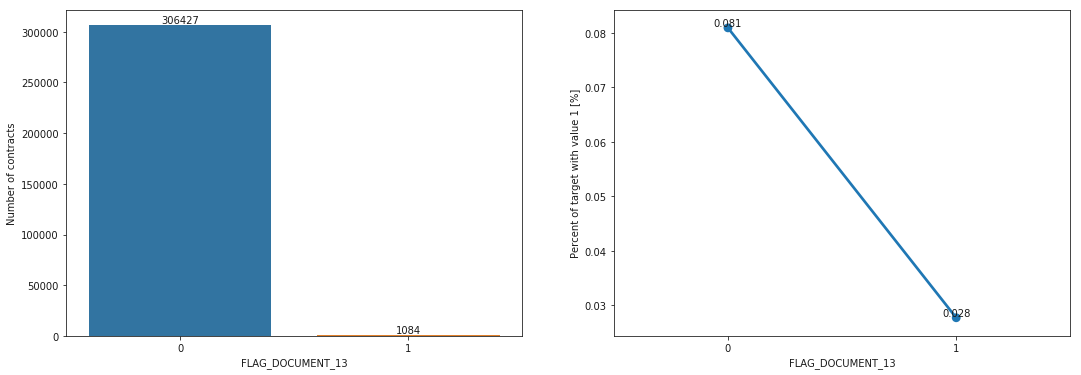

In [123]:
plot_stats('FLAG_DOCUMENT_13',application_train)

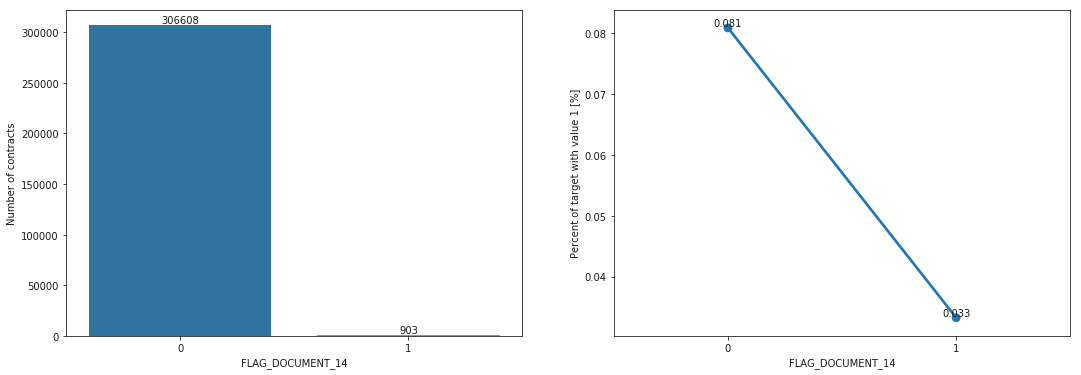

In [124]:
plot_stats('FLAG_DOCUMENT_14',application_train)

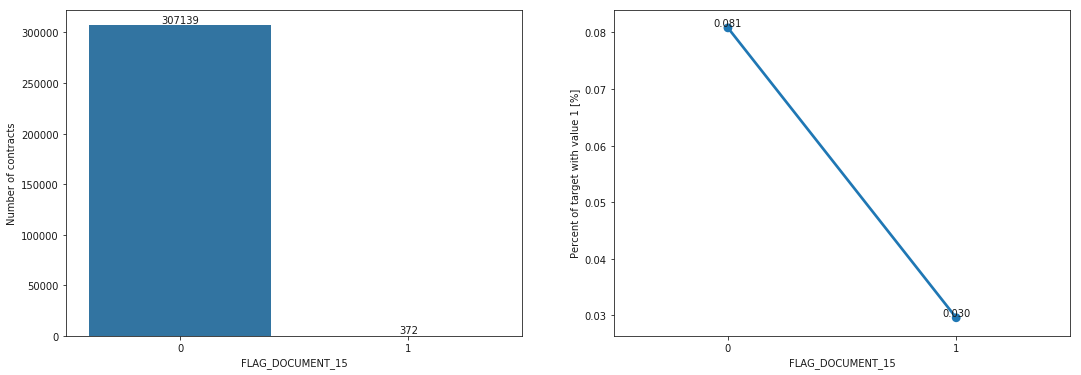

In [125]:
plot_stats('FLAG_DOCUMENT_15',application_train)

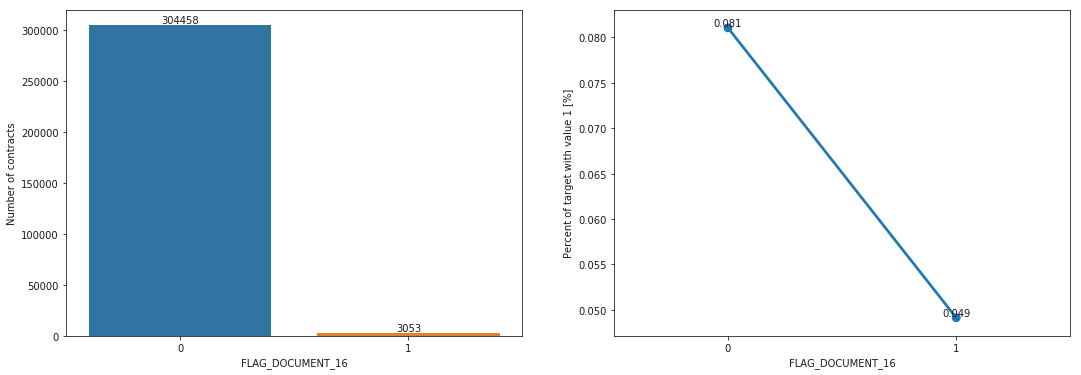

In [126]:
plot_stats('FLAG_DOCUMENT_16',application_train)

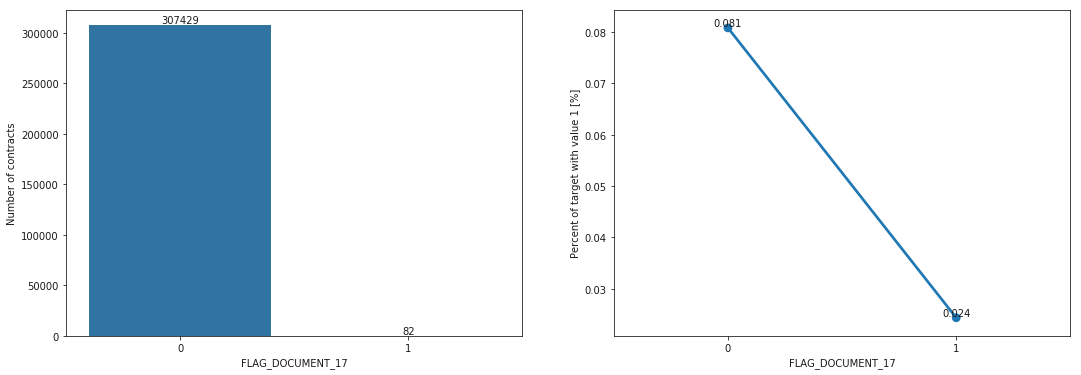

In [127]:
plot_stats('FLAG_DOCUMENT_17',application_train)

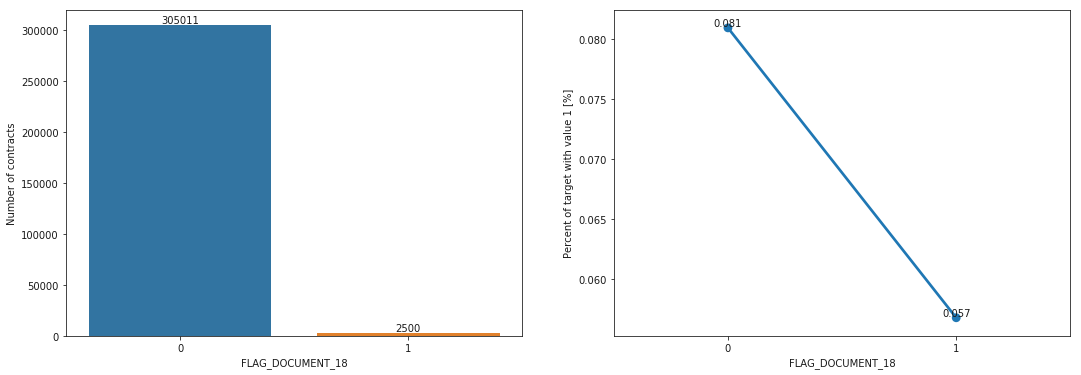

In [128]:
plot_stats('FLAG_DOCUMENT_18',application_train)

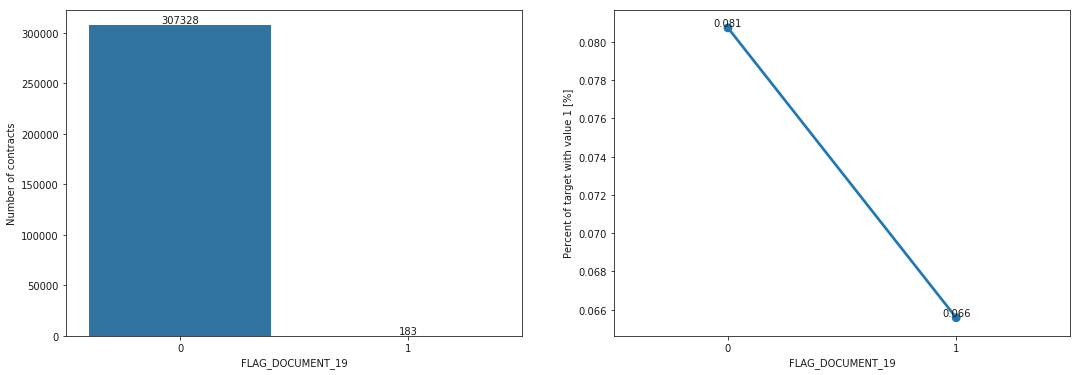

In [129]:
plot_stats('FLAG_DOCUMENT_19',application_train)

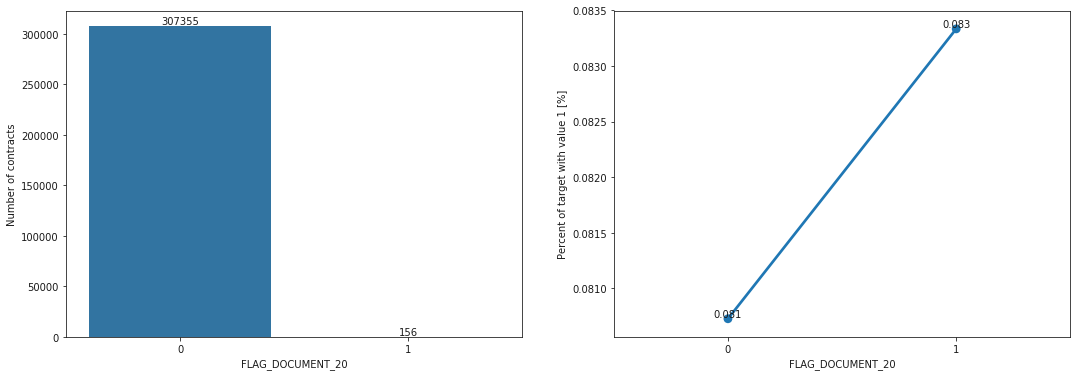

In [130]:
plot_stats('FLAG_DOCUMENT_20',application_train)

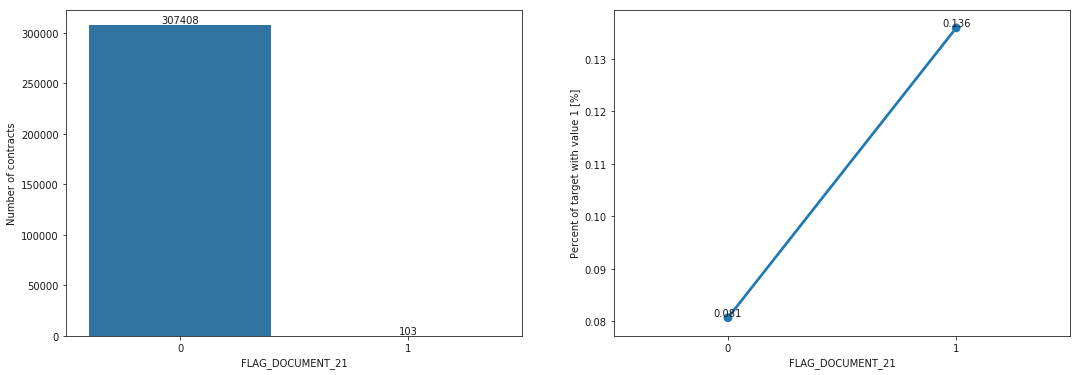

In [131]:
plot_stats('FLAG_DOCUMENT_21',application_train)

文件2-21 完整的记录很小很小，猜想申请人资料提供得越齐全违约概率越低，可以提取一个字段 ‘完整资料个数’

### 电话邮件信息完整程度

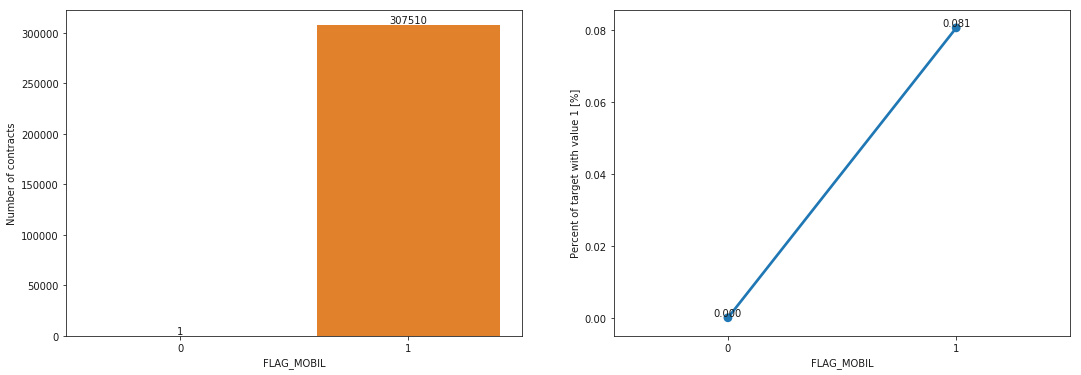

In [133]:
plot_stats('FLAG_MOBIL',application_train)

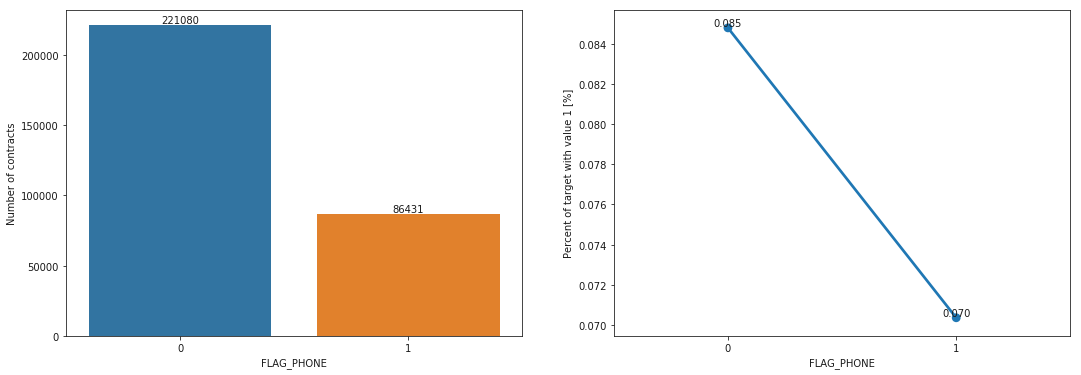

In [134]:
plot_stats('FLAG_PHONE',application_train)

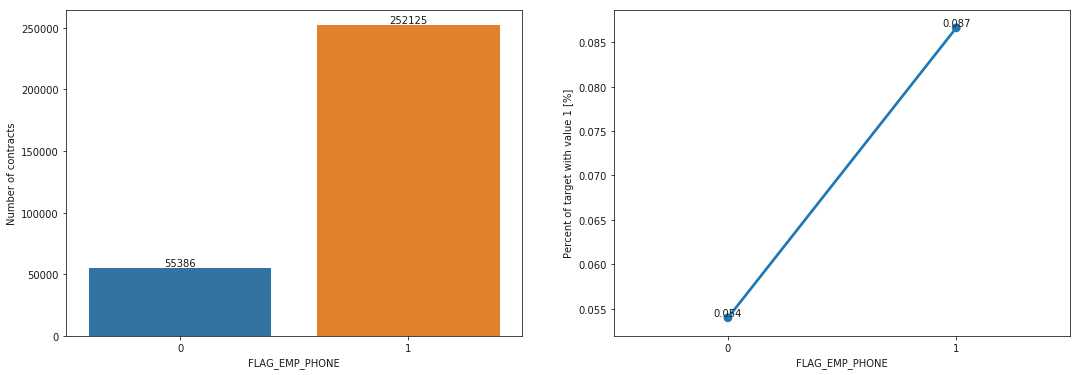

In [135]:
plot_stats('FLAG_EMP_PHONE',application_train)

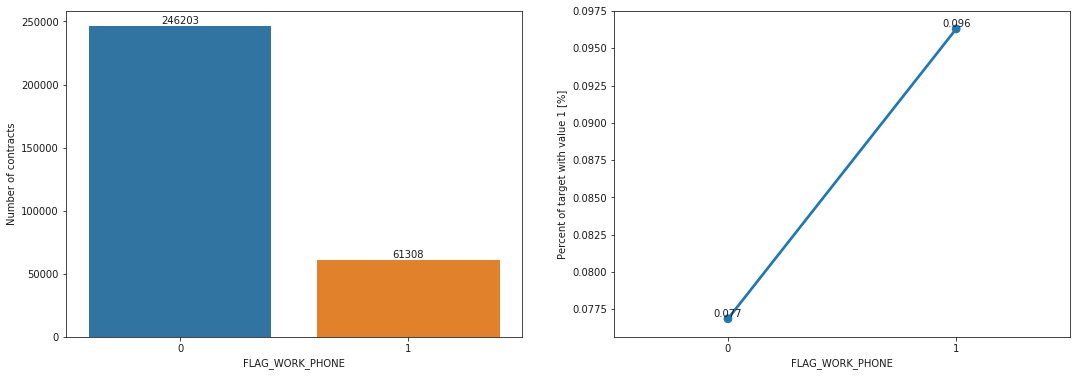

In [136]:
plot_stats('FLAG_WORK_PHONE',application_train)

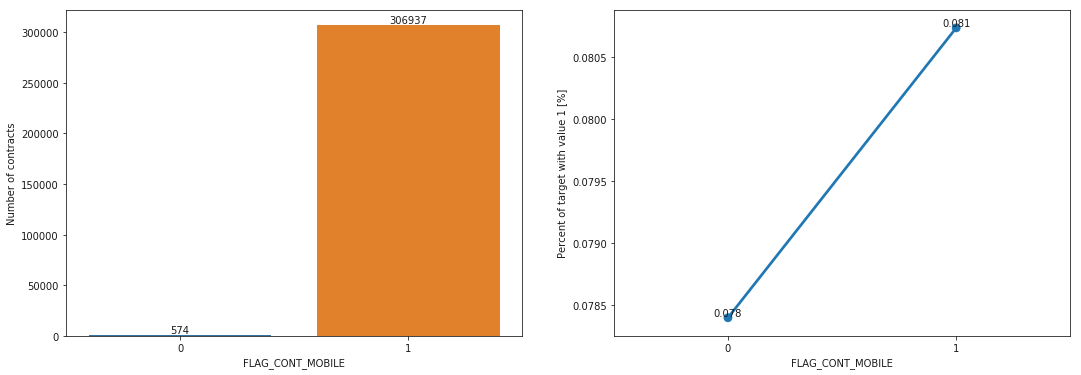

In [137]:
plot_stats('FLAG_CONT_MOBILE',application_train)

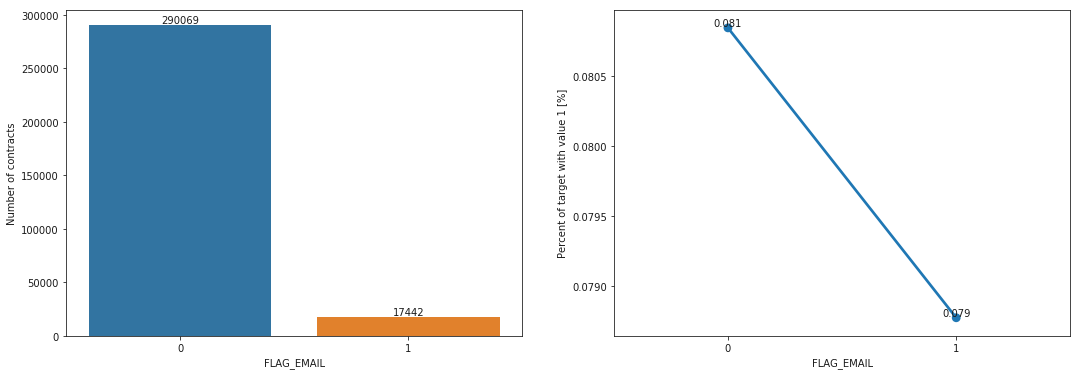

In [138]:
plot_stats('FLAG_EMAIL',application_train)

In [96]:
application_train.groupby('NAME_HOUSING_TYPE').count()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
NAME_HOUSING_TYPE,,,,,,,,,,,,,,,,,,,,,
Co-op apartment,1122,1122,1122,1122,1122,1122,1122,1122,1122,1122,...,1122,1122,1122,1122,992,992,992,992,992,992
House / apartment,272868,272868,272868,272868,272868,272868,272868,272868,272868,272858,...,272868,272868,272868,272868,236930,236930,236930,236930,236930,236930
Municipal apartment,11183,11183,11183,11183,11183,11183,11183,11183,11183,11182,...,11183,11183,11183,11183,9604,9604,9604,9604,9604,9604
Office apartment,2617,2617,2617,2617,2617,2617,2617,2617,2617,2617,...,2617,2617,2617,2617,2287,2287,2287,2287,2287,2287
Rented apartment,4881,4881,4881,4881,4881,4881,4881,4881,4881,4880,...,4881,4881,4881,4881,3970,3970,3970,3970,3970,3970
With parents,14840,14840,14840,14840,14840,14840,14840,14840,14840,14840,...,14840,14840,14840,14840,12209,12209,12209,12209,12209,12209


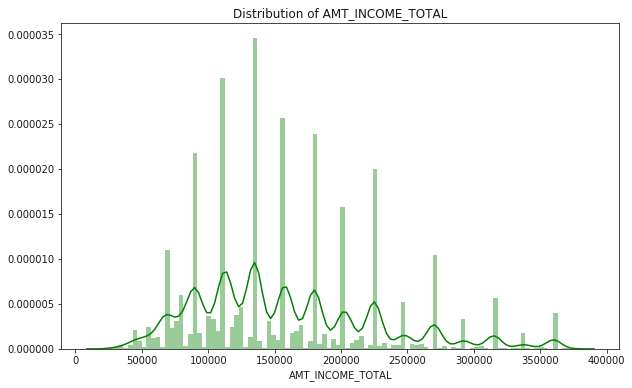

In [81]:
plot_o_distribution('AMT_INCOME_TOTAL',application_train,'green')

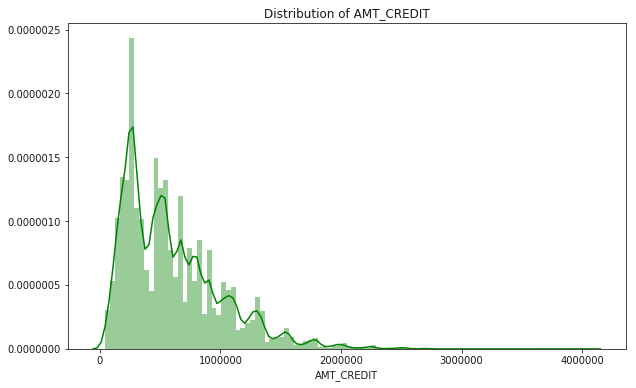

In [82]:
plot_distribution('AMT_CREDIT',application_train,'green')

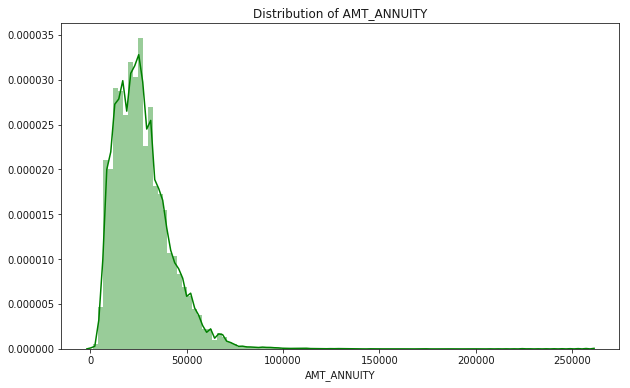

In [83]:
plot_distribution('AMT_ANNUITY',application_train,'green')

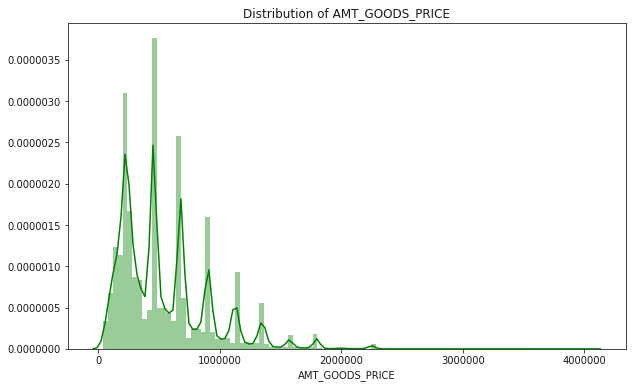

In [84]:
plot_distribution('AMT_GOODS_PRICE',application_train,'green')

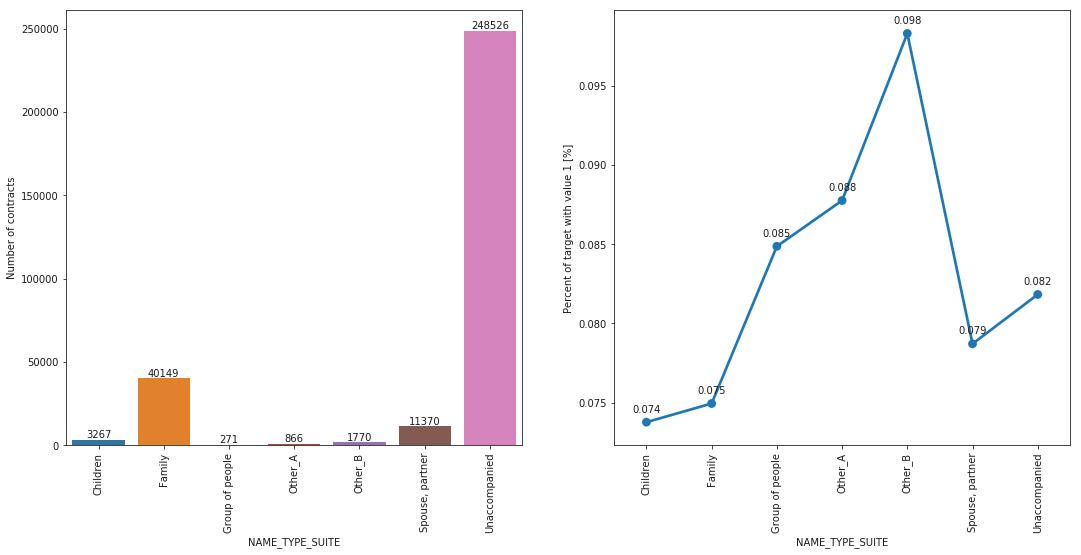

In [88]:
plot_stats('NAME_TYPE_SUITE',application_train,True,True)

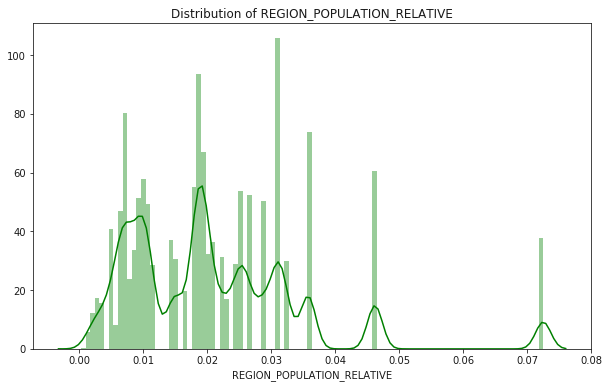

In [89]:
plot_distribution('REGION_POPULATION_RELATIVE',application_train,'green')

##  application_test

In [ ]:
application_test.info()

In [ ]:
application_test.describe()

In [ ]:
len(application_test['SK_ID_CURR'].unique())

## bureau

In [ ]:
bureau.info()

In [ ]:
bureau.describe()

In [ ]:
bureau.head()

####  SK_ID_CURR

In [ ]:
len(bureau['SK_ID_CURR'].unique())

application_train和test中共有307511+48744=356255条申请记录，但bureau表只包含了其中305811条

In [ ]:
len(bureau['SK_ID_BUREAU'].unique())

In [ ]:
application_bureau_train = application_train.merge(bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')
print("The resulting dataframe `application_bureau_train` has ",application_bureau_train.shape[0]," rows and ", 
      application_bureau_train.shape[1]," columns.")

#### CREDIT_ACTIVE 贷款状态

In [ ]:
plot_stats('CREDIT_ACTIVE',application_bureau_train)

申请者在征信机构的历史贷款记录中，大多数是已还清的。在其他渠道有坏账记录的申请者，在HOMECREDIT的贷款坏账率达到了20%

#### CREDIT_CURRENCY 货币种类

In [ ]:
plot_stats('CREDIT_CURRENCY',application_bureau_train)

货币1占了绝大多数，货币3的坏账率最高

####  CREDIT_TYPE 贷款类型

In [ ]:
plot_stats('CREDIT_TYPE',application_bureau_train,True,True)

大多数历史贷款的类型是消费贷，信用卡，车贷
坏账率前三的贷款类型是：为购买设备贷款，微型贷款，流动资金补充贷款

#### DAYS_CREDIT 这笔历史贷款的申请日期距离对应的HC(homecredit)贷款申请日期的天数

In [ ]:
plot_distribution('DAYS_CREDIT',application_bureau_train,'green')

距离申请日期越近，记录数越多

#### CREDIT_DAY_OVERDUE 在向本公司申请时，对应的其他信用机构贷款的逾期天数

In [ ]:
plot_distribution('CREDIT_DAY_OVERDUE',application_bureau_train,'green')

In [ ]:
plot_distribution('CREDIT_DAY_OVERDUE',application_bureau_train.loc[application_bureau_train['CREDIT_DAY_OVERDUE']>0],'green')

历史贷款大多数的逾期天数为0，发生逾期的记录其逾期天数在0-200天左右

#### DAYS_CREDIT_ENDDATE 距离申请日期为止该笔历史贷款剩余还款天数

In [ ]:
plot_distribution('DAYS_CREDIT_ENDDATE',application_bureau_train,'green')

#### DAYS_ENDDATE_FACT 距离申请日期，已还清贷款还清日至今的天数

In [ ]:
plot_distribution('DAYS_ENDDATE_FACT',application_bureau_train,'green')

#### AMT_CREDIT_MAX_OVERDUE 在向本公司申请时，最大逾期金额

In [ ]:
plot_distribution('AMT_CREDIT_MAX_OVERDUE',application_bureau_train,'green')

#### CNT_CREDIT_PROLONG 延期还款次数

In [ ]:
plot_stats('CNT_CREDIT_PROLONG',application_bureau_train,'green')

#### AMT_CREDIT_SUM 贷款额度

In [ ]:
plot_distribution('AMT_CREDIT_SUM',application_bureau_train,'green')

In [ ]:
plot_o_distribution('AMT_CREDIT_SUM',application_bureau_train,'green')

大多数都是小额贷款

#### AMT_CREDIT_SUM_DEBT 贷款余额

In [ ]:
plot_distribution('AMT_CREDIT_SUM_DEBT',application_bureau_train,'green')

该字段为负数的都是信用卡业务，说明该张信用卡里有钱

# 数据预处理

## 数据集准备

In [ ]:



app_test['is_test'] = 1 
app_test['is_train'] = 0
app_train['is_test'] = 0
app_train['is_train'] = 1

# target variable
Y = app_train['TARGET']
train_X = app_train.drop(['TARGET'], axis = 1)

# test ID
test_id = app_test['SK_ID_CURR']
test_X = app_test

# merge train and test datasets for preprocessing
data = pd.concat([train_X, test_X], axis=0)

## 分类型变量数值化与one-hot编码

In [ ]:
# 获取分类型变量
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# 分类型变量因子化
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# 分类型变量one-hot编码
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 



In [ ]:
# get categorical features
data_cats = _get_categorical_features(data)
prev_app_cats = _get_categorical_features(previous_application)
bureau_cats = _get_categorical_features(bureau)
pcb_cats = _get_categorical_features(pcb)
ccbal_cats = _get_categorical_features(credit_card_balance)

# create additional dummy features - 
previous_application = _get_dummies(previous_application, prev_app_cats)
bureau = _get_dummies(bureau, bureau_cats)
pcb = _get_dummies(pcb, pcb_cats)
credit_card_balance = _get_dummies(credit_card_balance, ccbal_cats)

# factorize the categorical features from train and test data
data = _factorize_categoricals(data, data_cats)

In [ ]:
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

## 使训练集和测试集有相同的列

In [ ]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

## 填补缺失值与归一化

In [ ]:
from sklearn.preprocessing import MinMaxScaler, Imputer

#训练集的X和测试集X
train_X = app_train.drop('TARGET',axis=1)
features = list(train_X.columns)

test_X = app_test.copy()

In [ ]:
# 用中位数填补缺失，默认NaN为缺失值，也可用missing_values指定哪个inger型为缺失值
imputer = Imputer(strategy = 'median')
# Fit on the training data
imputer.fit(train_X)
train_X = imputer.transform(train_X)
test_X = imputer.transform(test_X)

In [ ]:
# 归一化
scaler = MinMaxScaler(feature_range = (0, 1))
# Repeat with the scaler
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [ ]:
print('Training data shape: ', train_X.shape)
print('Testing data shape: ', test_X.shape)

# Baseline

## 逻辑回归 

In [ ]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train_X, train_labels)
log_reg_pred = log_reg.predict_proba(test)[:, 1]#模型预测标签为1的概率

In [ ]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

In [ ]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

## 随机森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50)
# Train on the training data
random_forest.fit(train, train_labels)

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

## 展示变量重要性

In [ ]:
# Function to calculate and show feature importances
def show_feature_importances(model, features):
    plt.figure(figsize = (12, 8))
    # Dataframe of feature importances sorted from most to least
    results = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    results = results.sort_values('importance', ascending = False)
    
    # Display
    print(results.head(10))
    print('\nNumber of features with importance greater than 0.01 = ', np.sum(results['importance'] > 0.01))
    
    # Plot of feature importances as horizontal bar chart
    results.head(20).plot(x = 'feature', y = 'importance', kind = 'barh',
                     color = 'red', edgecolor = 'k', title = 'Feature Importances');
    return results

In [ ]:
# Show the feature importances for the default features
feature_importances = show_feature_importances(random_forest, features)

# LGBT模型

In [ ]:
from sklearn.model_selection import train_test_split 
import lightgbm as lgb

#### prepare final Train X and Test X dataframes 
ignore_features = ['SK_ID_CURR', 'is_train', 'is_test']
relevant_features = [col for col in data.columns if col not in ignore_features]
trainX = data[data['is_train'] == 1][relevant_features]
testX = data[data['is_test'] == 1][relevant_features]


x_train, x_val, y_train, y_val = train_test_split(trainX, Y, test_size=0.2, random_state=18)
lgb_train = lgb.Dataset(data=x_train, label=y_train)
lgb_eval = lgb.Dataset(data=x_val, label=y_val)

params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 
          'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 5000, 'verbose': 0 ,
          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1, 
          'min_split_gain':.01, 'min_child_weight':1}
model = lgb.train(params, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)

lgb.plot_importance(model, figsize=(12, 25), max_num_features=100);
plt.show()

In [ ]:
preds = model.predict(testX)
sub_lgb = pd.DataFrame()
sub_lgb['SK_ID_CURR'] = test_id
sub_lgb['TARGET'] = preds
sub_lgb.to_csv("lgb_baseline.csv", index=False)
sub_lgb.head()